# 592B-F21 Class 2.2: Notes on amplitude and bit depth of audio files

I created a series of pure tones in Praat using the `Create sound as pure tone`command. I varied whether the amplitude was set to be 1 or 0.5. I also varied what file type I saved the audio as for the sound with amplitude 1:

- WAV file: `sine_440hz_1.wav` (amplitude 1) and `sine_440hz_0-5.wav` (amplitude 0.5)
- 32-bit WAV file: `sine_440hz_1_32bit.wav` (amplitude 1)
- 24-bit WAV file: `sine_440hz_1_24bit.wav` (ampltude 1)

Let's load the audio files in Python and inspect them and see how varying the amplitude and varying the file type affects the values.

Note that the [documentation on scipy.io.wavefile](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html) gives us some information about how different file types are represented. We'll be using `scipy.io.wavefile` to load the audio files and `matplotlib`to plot the sound waves. We will also use `numpy` to check the data type of the loaded file.

In [1]:
import scipy.io.wavfile as wavfile 
import matplotlib.pyplot as plt
import numpy as np

## Loading the audio files

We can check what WAV files are in the `audio/` sub-directory and assign those filenames to a list.

In [2]:
import glob

list_wavfiles = [f for f in glob.glob("audio/*.wav")]
print(list_wavfiles)

['audio\\sine_440hz_0-5.wav', 'audio\\sine_440hz_1.wav', 'audio\\sine_440hz_1_24bit.wav', 'audio\\sine_440hz_1_32bit.wav']


Let's first load one sound file, and then once we have a workflow for processing it, we can write code to process all of them the same way.

In [3]:
fs, sine = wavfile.read(list_wavfiles[0])

(What is the filename of the file we loaded?)
The sampling rate is often referred to as $f_s$, for *frequency of sampling*. What is the sampling rate for the file?

Let's also check out the data type of `sine`.

In [4]:
type(sine)

numpy.ndarray

It's a numpy array. We can check the numpy data type of the array:

In [22]:
sine.dtype

dtype('int16')

What is the bit depth for the file?

## Plotting the audio file
Now that we know the sampling rate and the bit depth (or quantization rate) of the file, let's try plotting it!

Text(0.5, 1.0, 'Wave file')

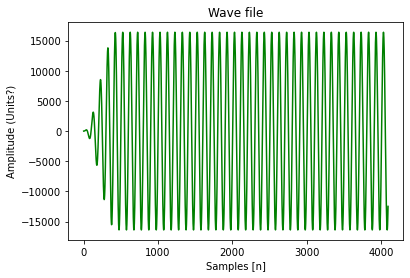

In [23]:
# Set up a new figure
plt.figure("sine")

# plot the first n samples
n = 4096 # number of samples to plot

plt.plot(sine[0:n], 'g', label=list_wavfiles[0])

# label the axes
plt.ylabel("Amplitude (Units?)")
plt.xlabel("Samples [n]")
# set the title  
plt.title("Wave file")

It looks like the values run between somewhere around -16000 to 16000. We can also check the min and max values:

In [5]:
print("Minimum value is: ", min(sine))
print("Maximum value is: ", max(sine))

Minimum value is:  -16384
Maximum value is:  16384


What do you make of this range of values?

Now inspect the sampling rate, bit depths, and range of values for the other files.

16384 = 2^14
32768 = 3^15
